In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import warnings

# #2

## (a)

(-10, 10)

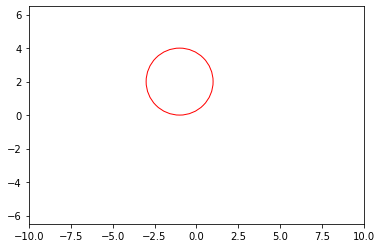

In [36]:
# Draw circle
circle =plt.Circle((-1,2), 2, color='r', fill=False)

fig, ax = plt.subplots()

ax.axis("equal")  # To avoid oval circles. Check the References.
ax.add_artist(circle)
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))

## (b)

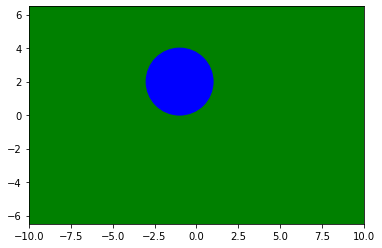

In [37]:
# Draw circle
circle_background =plt.Circle((-1,2), 20, color='g')  # Way to fool matplotlib and have a colored background.
circle =plt.Circle((-1,2), 2, color='b')

fig, ax = plt.subplots()

ax.axis("equal")  # To avoid oval circles. Check the References.
ax.add_artist(circle_background)
ax.add_artist(circle)
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
plt.show()

## (c)

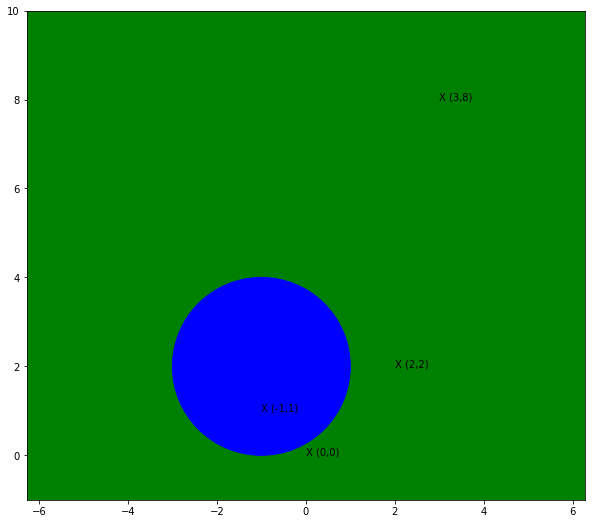

In [38]:
# Draw circle
circle_background =plt.Circle((-1,2), 20, color='g')  # Way to fool matplotlib and have a colored background.
circle =plt.Circle((-1,2), 2, color='b')

fig, ax = plt.subplots()
fig.set_size_inches(10, 9)

ax.axis("equal")  # To avoid oval circles. Check the References.
ax.add_artist(circle_background)
ax.add_artist(circle)
ax.set_xlim((-10,10))
ax.set_ylim((-1,10))

plt.annotate('X (0,0)', xy=(0,0), xytext=(0,0))
plt.annotate('X (-1,1)', xy=(-1,1), xytext=(-1,1))
plt.annotate('X (2,2)', xy=(2,2), xytext=(2,2))
plt.annotate('X (3,8)', xy=(3,8), xytext=(3,8))
plt.show()

# #4

In [2]:
# Plot classifiers
# Source: https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%209.ipynb
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [3]:
# Generate data set
control = 3  # Controls how mixed the classes can be.
np.random.seed(5)  # We changed the random.seed value until it gets what we wanted.
X = np.random.randn(100,2)
y = np.random.choice([-1,1], 100)
X[y == 1] = X[y == 1] - control

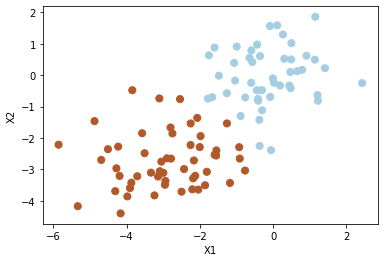

In [4]:
# Plot
plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [5]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [6]:
# Linear SVC
svc = SVC(kernel='linear', random_state=1)
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

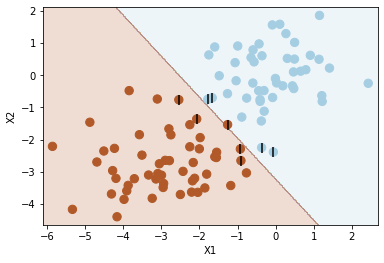

Number of support vectors:  9


In [8]:
# Plot
plot_svc(svc, X, y)

In [9]:
# Confusion matrices
print('Confusion matrix for train set: ', confusion_matrix(y_train, svc.predict(X_train)))
print('Confusion matrix for test set: ', confusion_matrix(y_test, svc.predict(X_test)))

Confusion matrix for train set:  [[37  0]
 [ 1 42]]
Confusion matrix for test set:  [[10  0]
 [ 0 10]]


In [10]:
# Error rate
print('Error rate for train set: ', (0+1)/(37+0+1+42))
print('Error rate for test set: ', (0+0)/(10+0+0+10))

Error rate for train set:  0.0125
Error rate for test set:  0.0


In [78]:
# Polynomial SVC
svc = SVC(kernel='poly', random_state=1)
svc.fit(X_train,y_train)
warnings.filterwarnings('ignore') #hide warnings

In [13]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

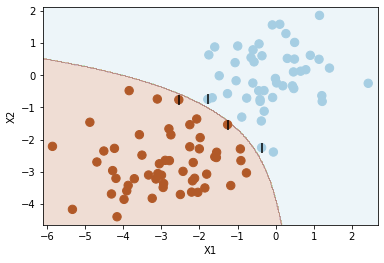

Number of support vectors:  4


In [14]:
# Plot
plot_svc(svc, X, y)

In [15]:
# Confusion matrices
print('Confusion matrix for train set: ', confusion_matrix(y_train, svc.predict(X_train)))
print('Confusion matrix for test set: ', confusion_matrix(y_test, svc.predict(X_test)))

Confusion matrix for train set:  [[37  0]
 [ 0 43]]
Confusion matrix for test set:  [[10  0]
 [ 0 10]]


In [16]:
# Error rate
print('Error rate for train set: ', (0+0)/(37+0+0+43))
print('Error rate for test set: ', (0+0)/(10+0+0+10))

Error rate for train set:  0.0
Error rate for test set:  0.0


In [79]:
# Radial SVC
svc = SVC(kernel='rbf', random_state=1)
svc.fit(X_train,y_train)
warnings.filterwarnings('ignore') #hide warnings

In [18]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

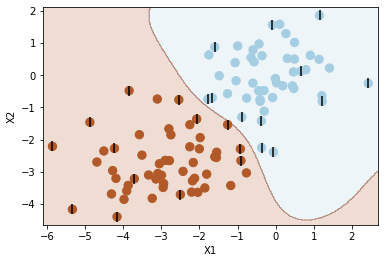

Number of support vectors:  25


In [19]:
# Plot
plot_svc(svc, X, y)

In [20]:
# Confusion matrices
print('Confusion matrix for train set: ', confusion_matrix(y_train, svc.predict(X_train)))
print('Confusion matrix for test set: ', confusion_matrix(y_test, svc.predict(X_test)))

Confusion matrix for train set:  [[37  0]
 [ 0 43]]
Confusion matrix for test set:  [[10  0]
 [ 0 10]]


In [21]:
# Error rate
print('Error rate for train set: ', (0+0)/(37+0+0+43))
print('Error rate for test set: ', (0+0)/(10+0+0+10))

Error rate for train set:  0.0
Error rate for test set:  0.0


The outcomes show a situation in which the linear SVC doesn't work as well as the other kernels (polynomial and radial). Considering the dataset, it is not possible to get a perfect prediction with a linear kernel. However, it is possible to get a perfect prediction with both the polynomial and the radial kernels. In this specific dataset, the polynomial and the radial error rates have the same value, but it is possible to notice the differences between these two kernels by the observation of the plots. The boundary line in the polynomial kernel has a shape similar to a polynomial function (!!!), while the boundary line resulting from the radial kernel is more flexible in its shape.

# #6

## (a)

In [23]:
# Generate dataset
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=0)

Text(0, 0.5, 'X2')

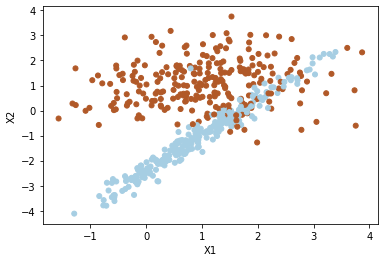

In [24]:
# Plot
plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

## (b)

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [26]:
# Cost range
cost_range = [0.01, .1, 1, 10]

In [27]:
# Cross-validation error rates
for i in cost_range:
    svc = SVC(kernel='linear', C=i, random_state=1)
    svc.fit(X_train, y_train)
    print('\ni = ', i)
    print('%.3f' % (np.average(1-cross_val_score(svc, X, y, cv=5, scoring='accuracy'))))


i =  0.01
0.140

i =  0.1
0.122

i =  1
0.126

i =  10
0.124


In [28]:
# Confusion matrix for a range of cost values
# This is a necessary step to get the number of misclassifications.
for i in cost_range:
    svc = SVC(kernel='linear', C=i, random_state=1)
    svc.fit(X_train, y_train)
    print('\ni =', i)
    print('Confusion matrix: ', confusion_matrix(y_train, svc.predict(X_train)))


i = 0.01
Confusion matrix:  [[153  23]
 [ 27 147]]

i = 0.1
Confusion matrix:  [[167   9]
 [ 32 142]]

i = 1
Confusion matrix:  [[163  13]
 [ 31 143]]

i = 10
Confusion matrix:  [[162  14]
 [ 31 143]]


In [29]:
# Misclassifications
misclass_1 = 23+27
misclass_2 = 9+32
misclass_3 = 13+31
misclass_4 = 14+31

misclass = [misclass_1, misclass_2, misclass_3, misclass_4]

for i in range(0,4):
    print('Misclassifications, i = %.3f, %i' % (cost_range[i], misclass[i]))

Misclassifications, i = 0.010, 50
Misclassifications, i = 0.100, 41
Misclassifications, i = 1.000, 44
Misclassifications, i = 10.000, 45


The cost value with less cross-validation error is C=0.1, which is also the cost value with less misclassifications. This is what we wanted to see because it shows that the training error (evaluated by the number of misclassifications) is in accordance with test error (here evaluated by the cross-validation error).

## (c)

In [30]:
# Generate dataset
X, y = make_classification(n_samples=500, random_state=1)

Text(0, 0.5, 'X2')

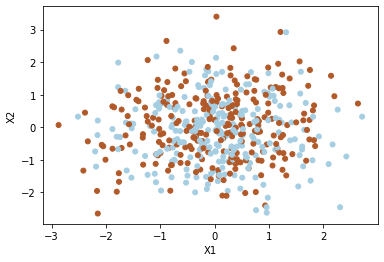

In [31]:
# Plot
plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [33]:
# Test errors
for i in cost_range:
    svc = SVC(kernel='linear', C=i, random_state=1)
    svc.fit(X_train, y_train)
    print('\ni: ', i)
    print('Test error: ', 1-accuracy_score(y_test, svc.predict(X_test)))


i:  0.01
Test error:  0.053333333333333344

i:  0.1
Test error:  0.06000000000000005

i:  1
Test error:  0.07999999999999996

i:  10
Test error:  0.08666666666666667


In [34]:
# Training errors
for i in cost_range:
    svc = SVC(kernel='linear', C=i, random_state=1)
    svc.fit(X_train, y_train)
    print('\ni: ', i)
    print('Training error: ', 1-accuracy_score(y_train, svc.predict(X_train)))


i:  0.01
Training error:  0.0485714285714286

i:  0.1
Training error:  0.05714285714285716

i:  1
Training error:  0.042857142857142816

i:  10
Training error:  0.037142857142857144


In [35]:
# Cross-validation errors
for i in cost_range:
    svc = SVC(kernel='linear', C=i, random_state=1)
    svc.fit(X_train, y_train)
    print('\ni: ', i)
    print('Cross-validation error: ', np.average(1-cross_val_score(svc, X, y, scoring='accuracy', cv=5)))


i:  0.01
Cross-validation error:  0.054021802180218015

i:  0.1
Cross-validation error:  0.05600160016001603

i:  1
Cross-validation error:  0.05802180218021804

i:  10
Cross-validation error:  0.06604200420042006


When the cost value is 10, the lowest training error is occurred. Yet the lowest cross-validation errors reaches when the cost value is 0.01. The lowest cross-validation error is also when the cost value is 0.01.

These results show that high cost values tend to overfit the data. They can give the best results regarding the training error, but when we try to generalize the results they don't work so well. This happens because an high cost value will reduce the number of support vector violating the margin. Thus, the approach gets too sticked to the observations of the training set and will not be able to generalize well, missing the noisy points.

# #8

In [47]:
 #Read dataset from R
OJ = sm.datasets.get_rdataset("OJ","ISLR").data

In [48]:
# Data overview
OJ.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [49]:
# Define predictors and response 
X = OJ.drop(axis=1, labels=['Purchase'])
y = OJ['Purchase']

In [51]:
#Dummy variables to transform qualitative into quantitative variables
X = pd.get_dummies(X)

## (a)

In [52]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=1)

## (b)

In [53]:
# Fit SVC to data
svc = SVC(C=0.01, kernel='linear', random_state=1)
svc.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [54]:
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [55]:
# Number of support vectors for each class
svc.n_support_

array([307, 304], dtype=int32)

In our dataset, we have 800 observations, 2 classes, and a total of 611 support vectors. From those support vectors, 307 belong to class CH and 304 to class MM.

## (c)

In [57]:
# Confusion matrix
print('Train confusion matrix: ', confusion_matrix(y_train, svc.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, svc.predict(X_test)))

Train confusion matrix:  [[489   7]
 [241  63]]
Test confusion matrix:  [[150   7]
 [ 90  23]]


In [58]:
# Error rate
train_err = (7+241)/(489+7+241+63)
test_err = (7+90)/(150+7+90+23)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)

Train error rate:  0.31
Test error rate:  0.3592592592592593


## (d)

In [84]:
# Hypertune cost using GridSearchCV
svc = SVC(kernel='linear', random_state=1)

parameters = {'C':np.arange(0.01, 10, 2)}

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
warnings.filterwarnings('ignore') #hide warnings

In [ ]:
GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([ 0.01,  2.01,  4.01,  6.01,  8.01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [86]:
# Best value for cost
clf.best_params_

{'C': 2.01}

## (e)

In [63]:
# Confusion matrix
print('Train confusion matrix: ', confusion_matrix(y_train, clf.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, clf.predict(X_test)))

Train confusion matrix:  [[436  60]
 [ 72 232]]
Test confusion matrix:  [[143  14]
 [ 30  83]]


In [64]:
# Error rate
train_err = (59+75)/(437+59+75+229)
test_err = (13+35)/(144+13+35+78)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)

Train error rate:  0.1675
Test error rate:  0.17777777777777778


## (f)

In [87]:
# Fit SVC to data
svc = SVC(C=0.01, kernel='rbf', random_state=1)
svc.fit(X_train, y_train)
warnings.filterwarnings('ignore') #hide warnings

In [88]:
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [89]:
# Number of support vectors for each class
svc.n_support_

array([321, 304], dtype=int32)

In [90]:
# Confusion matrix
print('Train confusion matrix: ', confusion_matrix(y_train, svc.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, svc.predict(X_test)))

Train confusion matrix:  [[496   0]
 [304   0]]
Test confusion matrix:  [[157   0]
 [113   0]]


In [91]:
# Error rate
train_err = (0+304)/(496+0+304+0)
test_err = (0+113)/(157+0+113+0)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)

Train error rate:  0.38
Test error rate:  0.4185185185185185


In [92]:
# Hypertune cost using GridSearchCV
svc = SVC(kernel='rbf', random_state=1)

parameters = {'C':np.arange(0.01, 10, 2)}

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

warnings.filterwarnings('ignore') #hide warnings

In [ ]:
GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([ 0.01,  2.01,  4.01,  6.01,  8.01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [93]:
# Best value for cost
clf.best_params_

{'C': 4.01}

In [94]:
# Confusion matrix
print('Train confusion matrix: ', confusion_matrix(y_train, clf.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, clf.predict(X_test)))

Train confusion matrix:  [[450  46]
 [ 94 210]]
Test confusion matrix:  [[145  12]
 [ 39  74]]


In [95]:
# Error rate
train_err = (40+78)/(456+40+78+226)
test_err = (11+36)/(146+11+36+77)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)

Train error rate:  0.1475
Test error rate:  0.17407407407407408


## (g)

In [96]:
# Fit SVC to data
svc = SVC(C=0.01, kernel='poly', degree=2, random_state=1)
svc.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [97]:
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [98]:
# Number of support vectors for each class
svc.n_support_

array([164, 164], dtype=int32)

In [99]:
# Confusion matrix
print('Train confusion matrix: ', confusion_matrix(y_train, svc.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, svc.predict(X_test)))

Train confusion matrix:  [[435  61]
 [ 70 234]]
Test confusion matrix:  [[140  17]
 [ 30  83]]


In [100]:
# Error rate
train_err = (61+70)/(435+61+70+234)
test_err = (17+30)/(140+17+30+83)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)

Train error rate:  0.16375
Test error rate:  0.17407407407407408


In [ ]:
# Hypertune cost using GridSearchCV
svc = SVC(kernel='poly', degree=2, random_state=1)

parameters = {'C':np.arange(0.01, 10, 2)}

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

In [ ]:
# Best value for cost
clf.best_params_

In [ ]:
# Confusion matrix
print('Train confusion matrix: ', confusion_matrix(y_train, clf.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, clf.predict(X_test)))

In [ ]:
# Error rate
train_err = (61+70)/(456+40+78+226)
test_err = (11+36)/(146+11+36+77)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)


## (h)

Overall, the approach that seems to give the best results on this data is poly.